In [149]:
import random
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df_location = pd.read_parquet(r'data\airbnb_madrid_location.parquet')
df_conditions = pd.read_parquet(r'data\airbnb_madrid_conditions.parquet')
df_host = pd.read_parquet(r'data\airbnb_madrid_host.parquet')
df_property = pd.read_parquet(r'data\airbnb_madrid_property.parquet')
df_reviews = pd.read_parquet(r'data\airbnb_madrid_reviews.parquet')

#List of dataframes
dfs = [df_location,df_conditions,df_host,df_property,df_reviews]

#Merge them
df = dfs[0]
for result in dfs[1:]:
    df = pd.merge(df, result, on='id')


print(f' dataset shape: {df.shape}')
print(df.columns)





 dataset shape: (21020, 52)
Index(['id', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude',
       'dist_km_sol', 'dist_km_airport', 'price', 'minimum_nights',
       'maximum_nights', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'host_verifications_email', 'host_verifications_phone',
       'host_verifications_reviews', 'host_verifications_facebook',
       'host_verifications_government_id', 'calculated_host_listings_count',
       'host_seniority', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities_wifi_internet',
       'amenities_tv', 'amenities_air_conditioning', 'amenities_heating',
       'amenities_kitchen', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       're

In [151]:
df.head()

,id,neighbourhood,neighbourhood_group,latitude,longitude,dist_km_sol,dist_km_airport,price,minimum_nights,maximum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros
0,0,Chamartín,Chamartín,40.45628,-3.67763,6.769415,11.162062,70.0,1,365,...,10.0,10.0,9.0,10.0,0.61,28,3589,65.0,5.0,3.0
1,1,Aluche,Latina,40.40341,-3.74084,4.433720,18.198818,17.0,4,40,...,10.0,10.0,8.0,9.0,0.52,544,1918,17.0,12.0,4.0
2,2,Legazpi,Arganzuela,40.38695,-3.69304,4.552379,15.799212,50.0,15,730,...,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN
3,3,Malasaña,Centro,40.42202,-3.70395,1.848181,14.020964,80.0,5,730,...,10.0,10.0,10.0,10.0,0.14,7,1868,6.0,2.0,1.0
4,4,Justicia,Centro,40.41995,-3.69764,2.317480,13.364384,115.0,3,10,...,10.0,10.0,10.0,10.0,0.64,33,3144,37.0,23.0,7.0


#### Precio

Buscar aquel precio de corte, los quintiles, que ventajas tienen aquellos pisos top, en relación a los inferiores

In [152]:

#Calculo las métricas estándar
df.price.mean()
print(f'la media de precio es {df.price.mean()}')
print(f'la mediana de precio es {df.price.median()}')
print(f'la moda de precio es {df.price.mode()[0]}')

#Calculo los Quantiles
price_q_25 = df.price.quantile(0.25)
price_q_50 = df.price.quantile(0.50)
price_q_75 = df.price.quantile(0.75)
price_q_95 = df.price.quantile(0.95)

# filtered_prices = df[(102.0 >= df['price'] <= 400.0 )]
#Target price va desde los 102€ hasta los 400 € incluidos
between_q75_q95 = df[(df['price'] > price_q_75) & (df['price'] <= price_q_95)]

count_between = between_q75_q95.price.value_counts()

print(f'el total entre es {count_between}')


print(f'El precio inferior al 25% es {price_q_25}')

print((df.price > price_q_25).value_counts())

print(f'El precio top_25 es {price_q_75}')

print((df.price > price_q_75).value_counts())

# print((df.price(price_q_75 < price_q_95)).value_counts())

print(f"Quantil 25: {price_q_25}")
print(f"Quantil 50: {price_q_50}")
print(f"Quantil 75: {price_q_75} hasta {price_q_95}")
print(f"Quantil 80: {df.price.quantile(0.80)}")

#Descubro que me quiero centrar en el top20 de mis pisos, ya que representan más de 4000 pisos



valor_q80 = df.price.quantile(0.80)
print(f'el precio top ten mas caro es {valor_q80}')
df["is_top20"] = df.price.gt(valor_q80)
# df.is_top25.value_counts()
# df.price.value_counts()



# df["target_price"] = df.price.gt(count_between)
# df.target_price.value_counts()
# df.price.value_counts()


df.host_verifications_government_id.value_counts()
df.is_top20.value_counts()

# df.pop('is_top25')
# df.head()



la media de precio es 131.32621313035204
la mediana de precio es 65.0
la moda de precio es 50.0
el total entre es price
120.0    359
150.0    333
200.0    286
110.0    254
300.0    168
        ... 
306.0      1
202.0      1
226.0      1
231.0      1
218.0      1
Name: count, Length: 217, dtype: int64
El precio inferior al 25% es 40.0
price
True     15208
False     5812
Name: count, dtype: int64
El precio top_25 es 102.0
price
False    15778
True      5242
Name: count, dtype: int64
Quantil 25: 40.0
Quantil 50: 65.0
Quantil 75: 102.0 hasta 400.0
Quantil 80: 120.0
el precio top ten mas caro es 120.0


is_top20
False    16903
True      4117
Name: count, dtype: int64

In [153]:
df.head()

,id,neighbourhood,neighbourhood_group,latitude,longitude,dist_km_sol,dist_km_airport,price,minimum_nights,maximum_nights,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros,is_top20
0,0,Chamartín,Chamartín,40.45628,-3.67763,6.769415,11.162062,70.0,1,365,...,10.0,9.0,10.0,0.61,28,3589,65.0,5.0,3.0,False
1,1,Aluche,Latina,40.40341,-3.74084,4.433720,18.198818,17.0,4,40,...,10.0,8.0,9.0,0.52,544,1918,17.0,12.0,4.0,False
2,2,Legazpi,Arganzuela,40.38695,-3.69304,4.552379,15.799212,50.0,15,730,...,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,False
3,3,Malasaña,Centro,40.42202,-3.70395,1.848181,14.020964,80.0,5,730,...,10.0,10.0,10.0,0.14,7,1868,6.0,2.0,1.0,False
4,4,Justicia,Centro,40.41995,-3.69764,2.317480,13.364384,115.0,3,10,...,10.0,10.0,10.0,0.64,33,3144,37.0,23.0,7.0,False


In [154]:
df.head()
df.is_top20.value_counts()

is_top20
False    16903
True      4117
Name: count, dtype: int64

<Axes: xlabel='is_top20', ylabel='neighbourhood_group'>

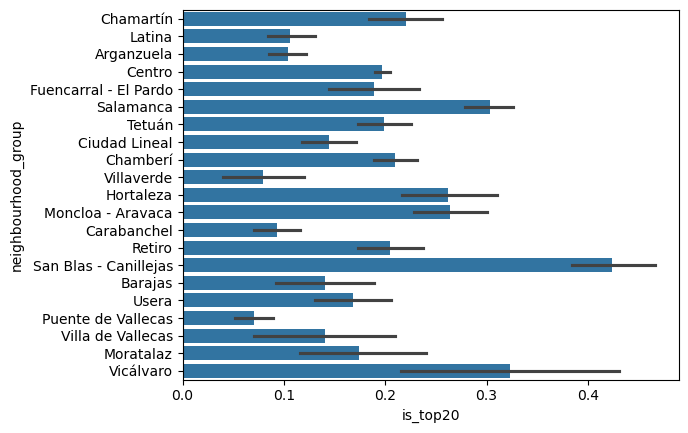

In [155]:
sns.barplot(
    data=df,
    x='is_top20',
    y='neighbourhood_group'
    
)

### Rating

Buscar si hay algún indice con respecto a los ratings

In [156]:
# df.review_scores_rating.mean()
# print(f'la media de rating es {df.review_scores_rating.mean()}')
# print(f'la mediana de rating es {df.review_scores_rating.median()}')
# print(f'la moda de rating es {df.review_scores_rating.mode()[0]}')

# price_q_25 = df.review_scores_rating.quantile(0.25)
# price_q_50 = df.review_scores_rating.quantile(0.50)
# price_q_75 = df.review_scores_rating.quantile(0.75)
# print(f"Quantil 25: {price_q_25}")
# print(f"Quantil 50: {price_q_50}")
# print(f"Quantil 75: {price_q_75}")

# df.review_scores_rating.isnull().value_counts()
# valor_q90 = df.review_scores_rating.quantile(0.90)
# print(f'el precio top ten mas caro es {valor_q90}')
# df["rating_is_top10"] = df.review_scores_rating.gt(valor_q90)
# df.is_top10.value_counts()

# df.review_scores_rating.quantile(0.75).value_counts()

# AirBnB Madrid

Uno de nuestros clientes opera en el mercado de inmuebles. Está especialmente
interesado en Madrid, donde posee una cantidad importante de viviendas
publicadas en la plataforma AirBnB y nos pide que le asesoremos respondiendo a
la siguiente pregunta:

<div style="text-align:center; color:red; font-size:larger; font-weight:bold; border: 2px solid red; padding: 10px;">
    ¿Qué puedo hacer para optimizar el precio de mis viviendas?
</div>

El objetivo del proyecto será elaborar un Data Storytelling que de respuesta a
nuestro cliente siguiendo los siguientes pasos:

1. Elaborar un contexto del problema
2. Definir el problema que queremos resolver
3. Definir y desarrollar el roadmap del análisis
4. Recopilar los principales insights para montar el data storytelling final:
    - contexto
    - problema
    - insights

### Definición del Problema

- ``concreto`` $\rightarrow$ que entendemos por ``optimizar el precio`` de un piso?
- ``alcance`` $\rightarrow$ que ``pisos`` analizaremos? en cuales me ``centro más mi atención`` para comparar?
- ``valor`` $\rightarrow$ que ``valor`` tiene para miguel responder a su pregunta?
- ``accionable`` $\rightarrow$ una vez respondido a estás preguntas, como puede miguel tomar ``acción`` a las conclusiones? 

- ``concreto`` $\rightarrow$ entendemos por ``optimizar el precio`` de un piso a aumentar el valor de alquiler del mismo. Si aquellos que tienen un precio superior es porque tienen algo de distinto al resto con precios inferiores. Por el contrario, puede haber características, que de cumplirse deberían hacerme revisar si el precio es adecuado o debería bajarlo. Si las viviendas que sean "X" tienen un precio más bajo que las que no, podrías recomendarme bajar el precio en esas viviendas si tuviese viviendas con esta característica.
- ``alcance`` $\rightarrow$ nos centraremos en el top25 de precios, ya que creemos que un estimado de ``100€`` la noche es el adecuado. La información vendrá del año ``2018``, ya que por política de AirBnB, los datos se vuelven públicos 5 años después. Remarcar que luego vino el COVID, y los precios han variado mucho de un año a otro.
- ``valor`` $\rightarrow$ si conseguimos entender en que variables fijarnos para ``optimizar el precio`` de los pisos, Miguel podrá tomar decisiones para adecuar sus pisos y así escribir el precio correcto.  
- ``accionable`` $\rightarrow$ luego de conseguir influir en aquellas variables que me ayudan a ``al aumentar el precio``, Miguel podrá tener los pisos en mejores condiciones, y así aumentar la calidad de sus ``rating`` recibiendo reviews positivas.



### RoadMap

Para optimizar el precio de mis pisos puedo pensar en lo siguiente.
- Dividir por quintiles, cuantos pisos clasifico yo de Top en base al precio
    - Si el propietario es superHost, mi piso estará dentro del Top10?
    - Si estoy verificado por el gobierno, influye a poder aumentar mi precio?
- Hacer mención a la relación entre ubicación y precio
    - Influye a cuantos KM estoy de puerta del Sol? o del Aeropuerto?
    - Barrios más caros? precio por m2 influye?
- Relacionar el precio con la cantidad de habitaciones, cuanto pagarían por persona
- Relacionar el precio con el rating
- Cuantas ammenities tiene y compararlo con el precio. Amenities, wifi, air_conditioning, heating, kitchen
- el total de las reviews influye? Como se relaciona con el precio?
- Puedo aumentar mi precio en relación a las políticas de cancelación? A las condiciones que ofrezco?


### Hipótesis
- ``H 1``: el precio de un piso ``top_20`` depende de la situación del ``Host``
    - ``q 1``: SuperHost
    - ``q 2``: Validado por el Gobierno
    - ``q 3``: La cara del Host es visible? Importancia que le da a la confianza?
- ``H 2``: el precio de un piso ``top_20`` depende de ``Ubicación``, más que nada para tener un pantallazo general
    - ``q 1``: Dónde está ubicado. Barrio caro, barrio barato?
    - ``q 2``: Distancia de puerta del sol
    - ``q 3``: 
- ``H 3``: el precio de un piso ``top_20`` depende de ``tipo de propiedad``
    - ``q 1``: Si es una Casa, un apartamento, un duplex
    - ``q 2``: Húespedes que se pueden alojar
        - ``q 2.1``: Tipo de Habitación, compartida o individual
        - ``q 2.2``: Cantidad de Habitaciones por piso, es decir serían pisos más grandes
    - ``q 3``: Cantidad de baños
    - ``q 4``: Wifi
    - ``q 5``: AC
    - ``q 6``: Heating
    - ``q 7``: TV
    - ``q 8``: Kitchen


- ``H 4``: el precio de un piso ``top_20`` depende de las condiciones de contratación
    - ``q 1``: Políticas de Cancelación, cuantos días antes
    - ``q 2``: Influye la Foto del húesped?
    - ``q 3``: Influye la llamada de verificación?
    - ``q 4``: ¿El mínimo de noches ya compromete al inquilino a pagar más?

- ``H 5``: el precio de un piso ``top_20`` depende de las reviews?
    - ``q 1``: El number de reviews totales juega un papel importante? Y las recibidas el último año?
    - ``q 2``: Influye el rating al precio? A mayor rating mayor precio ofrecido? 
    - ``q 3``: Piso limpio, habla bien del host? ``review_scores_cleanliness``
    - ``q 4``: a que nos referimos con las puntuaciones de valor? Tienen mayor relevancia?
    - ``q 5``: tener un check-in sencillo hace que la gente quiera pagar un precio mayor? ``review_scores_checkin`` 

# 0. Data

Para realizar este proyecto contamos con el siguiente set de datos:

| Fichero                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| airbnb_madrid_host.parquet       | Información del propietario de cada vivienda.                               |
| airbnb_madrid_location.parquet   | Información de la localización de cada vivienda.                            |
| airbnb_madrid_property.parquet   | Información de la vivienda.                                                 |
| airbnb_madrid_conditions.parquet | Información de las condiciones de cada vivienda para poder alquilarla.      |
| airbnb_madrid_reviews.parquet    | Información de las reseñas de cada vivienda.                                |

Y en cada set de datos se cuenta con las siguientes variables:

<Axes: ylabel='price'>

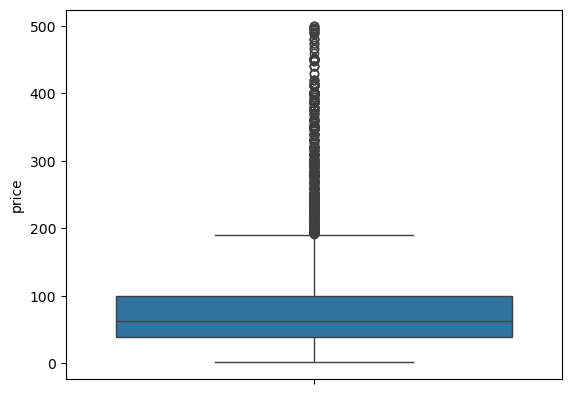

In [157]:
#Box-plot de la variable precios

sns.boxplot(
    data=df.query('price < 200'),
    y= 'price'
)

airbnb_madrid_host.parquet

| Columna                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| id                               | Identificador único de la publicación en Airbnb.                            |
| host_response_time               | Tiempo que tarda el anfitrión en responder a las consultas.                 |
| host_response_rate               | Tasa de respuesta del anfitrión.                                            |
| host_is_superhost                | Indica si el anfitrión es un "superhost" o no.                              |
| host_has_profile_pic             | Indica si el anfitrión tiene una foto de perfil en su cuenta.               |
| host_identity_verified           | Indica si la identidad del anfitrión ha sido verificada por Airbnb.         |
| host_seniority                   | Antigüedad del anfitrión como miembro de Airbnb.                            |
| host_verifications_email         | Indica si el anfitrión ha verificado su correo electrónico.                 |
| host_verifications_phone         | Indica si el anfitrión ha verificado su número de teléfono.                 |
| host_verifications_reviews       | Indica si el anfitrión ha verificado a través de reseñas de otros huéspedes.|
| host_verifications_facebook      | Indica si el anfitrión ha verificado su cuenta de Facebook.                 |
| calculated_host_listings_count   | Número de propiedades que el anfitrión tiene en Airbnb.                     |
| host_verifications_government_id | Indica si el anfitrión ha verificado su identificación gubernamental.       |

airbnb_madrid_location.parquet

| Columna                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| id                               | Identificador único de la publicación en Airbnb.                            |
| neighbourhood                    | Barrio donde se encuentra la propiedad.                                     |
| neighbourhood_group              | Grupo de barrios al que pertenece el barrio.                                |
| latitude                         | Latitud de la ubicación de la propiedad.                                    |
| longitude                        | Longitud de la ubicación de la propiedad.                                   |
| dist_km_sol                      | Distancia en kilómetros desde la propiedad hasta la plaza de de Sol.        |
| dist_km_airport                  | Distancia en kilómetros desde la propiedad hasta el aeropuerto.             |

airbnb_madrid_property.parquet

| Columna                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| id                               | Identificador único de la publicación en Airbnb.                            |
| property_type                    | Tipo de propiedad (casa, apartamento, etc.).                                |
| room_type                        | Tipo de habitación (compartida, privada, etc.).                             |
| accommodates                     | Número máximo de huéspedes que pueden alojarse en la propiedad.             |
| bathrooms                        | Número de baños en la propiedad.                                            |
| bedrooms                         | Número de dormitorios en la propiedad.                                      |
| beds                             | Número de camas en la propiedad.                                            |
| bed_type                         | Tipo de cama (individual, doble, etc.).                                     |
| amenities_wifi_internet          | Indica si la propiedad ofrece wifi o internet como amenidad.                |
| amenities_tv                     | Indica si la propiedad ofrece televisión como amenidad.                     |
| amenities_air_conditioning       | Indica si la propiedad ofrece aire acondicionado como amenidad.             |
| amenities_heating                | Indica si la propiedad ofrece calefacción como amenidad.                    |
| amenities_kitchen                | Indica si la propiedad ofrece cocina como amenidad.                         |

airbnb_madrid_conditions.parquet

| Columna                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| id                               | Identificador único de la publicación en Airbnb.                            |
| price                            | Precio de alquiler por noche de la propiedad.                               |
| minimum_nights                   | Mínimo de noches requeridas para reservar la propiedad.                     |
| maximum_nights                   | Máximo de noches permitidas para reservar la propiedad.                     |
| cancellation_policy              | Política de cancelación de reservas de la propiedad.                        |
| require_guest_profile_picture    | Indica si se requiere foto de perfil de los huéspedes.                      |
| require_guest_phone_verification | Indica si se requiere verificación telefónica de los huéspedes.             |

airbnb_madrid_reviews.parquet

| Columna                          | Descripción                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| id                               | Identificador único de la publicación en Airbnb.                            |
| number_of_reviews                | Número total de reseñas recibidas para la propiedad.                        |
| number_of_reviews_ltm            | Número de reseñas recibidas en el último año.                               |
| review_scores_rating             | Puntuación general de reseñas de la propiedad.                              |
| review_scores_accuracy           | Puntuación de precisión en las reseñas de la propiedad.                     |
| review_scores_cleanliness        | Puntuación de limpieza en las reseñas de la propiedad.                      |
| review_scores_checkin            | Puntuación de check-in en las reseñas de la propiedad.                      |
| review_scores_communication      | Puntuación de comunicación en las reseñas de la propiedad.                  |
| review_scores_location           | Puntuación de ubicación en las reseñas de la propiedad.                     |
| review_scores_value              | Puntuación de valor en las reseñas de la propiedad.                         |
| reviews_per_month                | Número promedio de reseñas por mes para la propiedad.                       |
| days_since_last_review           | Días transcurridos desde la última reseña recibida para la propiedad.       |
| days_since_first_review          | Días transcurridos desde la primera reseña recibida para la propiedad.      |
| number_of_reviews_en             | Número de reseñas en inglés recibidas para la propiedad.                    |
| number_of_reviews_es             | Número de reseñas en español recibidas para la propiedad.                   |
| number_of_reviews_otros          | Número de reseñas en otros idiomas recibidas para la propiedad.             |

- ``H 1``: el precio de un piso ``top_25`` depende de la situación del ``Host``
    - ``q 1``: SuperHost
    - ``q 2``: Validado por el Gobierno
    - ``q 3``: La cara del Host es visible? Importancia que le da a la confianza?

In [158]:
# px.box(
#     data_frame=df,
#     y='host_is_superhost',
#     x='is_top20'
#     )

df.groupby('host_is_superhost')['is_top20'].sum()

host_is_superhost
0    3475
1     642
Name: is_top20, dtype: int64

In [159]:
px.box(
    data_frame=df,
    x='host_verifications_government_id',
    y='price',
    color='price' 
)

- ``H 2``: el precio de un piso ``top_25`` depende de ``Ubicación``, más que nada para tener un pantallazo general
    - ``q 1``: Dónde está ubicado. Barrio caro, barrio barato?
    - ``q 2``: Distancia de puerta del sol

In [160]:
# seleccionamos los barrios para los que tenemos al menos 10 pisos
top_barrios = (
    df
    .value_counts('neighbourhood_group')
    .sort_values(ascending=False)
    .to_frame(name='n')
    .query("n > 10")
    .index
    )
# filtramos los barrios y contamos la proporción de pisos top vs no-top
df_ = (
    df
    .query('neighbourhood_group.isin(@top_barrios)')
    .groupby('neighbourhood_group',as_index=False)
    .value_counts(['is_top20'], normalize=True)
    .sort_values('proportion')
)
#barplot
px.bar(
    data_frame=df_,
    x='proportion',
    y='neighbourhood_group',
    color='is_top20',
    barmode='relative'
)

In [161]:
#Distancia Puerta del sol

px.box(
    data_frame=df,
    x="is_top20",
    y="dist_km_sol",
    color="is_top20",
)

### Hipotesis 3

- ``H 3``: el precio de un piso ``top_20`` depende de ``tipo de propiedad``
    - ``q 1``: Si es una Casa, un apartamento, un duplex
    - ``q 2``: Húespedes que se pueden alojar
        - ``q 2.1``: Tipo de Habitación, compartida o individual
        - ``q 2.2``: Cantidad de Habitaciones por piso, es decir serían pisos más grandes
    - ``q 3``: Cantidad de baños
    - ``q 4``: Wifi
    - ``q 5``: AC
    - ``q 6``: Heating
    - ``q 7``: TV
    - ``q 8``: Kitchen

In [162]:
df.columns

Index(['id', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude',
       'dist_km_sol', 'dist_km_airport', 'price', 'minimum_nights',
       'maximum_nights', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'host_verifications_email', 'host_verifications_phone',
       'host_verifications_reviews', 'host_verifications_facebook',
       'host_verifications_government_id', 'calculated_host_listings_count',
       'host_seniority', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities_wifi_internet',
       'amenities_tv', 'amenities_air_conditioning', 'amenities_heating',
       'amenities_kitchen', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'r

In [213]:
df_b = df['property_type'].value_counts()['apartment']

df["is_apartment"] = df.price.gt(df_b)
df.head()



,id,neighbourhood,neighbourhood_group,latitude,longitude,dist_km_sol,dist_km_airport,price,minimum_nights,maximum_nights,...,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros,is_top20,is_apartment
0,0,Chamartín,Chamartín,40.45628,-3.67763,6.769415,11.162062,70.0,1,365,...,9.0,10.0,0.61,28,3589,65.0,5.0,3.0,False,False
1,1,Aluche,Latina,40.40341,-3.74084,4.433720,18.198818,17.0,4,40,...,8.0,9.0,0.52,544,1918,17.0,12.0,4.0,False,False
2,2,Legazpi,Arganzuela,40.38695,-3.69304,4.552379,15.799212,50.0,15,730,...,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,False,False
3,3,Malasaña,Centro,40.42202,-3.70395,1.848181,14.020964,80.0,5,730,...,10.0,10.0,0.14,7,1868,6.0,2.0,1.0,False,False
4,4,Justicia,Centro,40.41995,-3.69764,2.317480,13.364384,115.0,3,10,...,10.0,10.0,0.64,33,3144,37.0,23.0,7.0,False,False


In [216]:
df.groupby('is_top20')['property_type'].value_counts()

is_top20  property_type        
False     apartment                13956
          house                      872
          condominium                642
          loft                       623
          serviced_apartment         182
          hostel                     151
          bed_and_breakfast          116
          guest_suite                 72
          guesthouse                  64
          other                       63
          townhouse                   47
          chalet                      23
          tiny_house                  18
          casa_particular_cuba_       15
          camper_rv                   13
          hotel                       12
          boutique_hotel              11
          villa                        5
          barn                         3
          dome_house                   3
          earth_house                  3
          hut                          3
          aparthotel                   2
          bungalow       

In [211]:
df.groupby('is_top20')['is_apartment'].value_counts()


is_top20  is_apartment
False     False           16903
True      False            4117
Name: count, dtype: int64

In [215]:
df_a = df[df['property_type'] == 'apartament']
df_a


,id,neighbourhood,neighbourhood_group,latitude,longitude,dist_km_sol,dist_km_airport,price,minimum_nights,maximum_nights,...,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros,is_top20,is_apartment


In [ ]:
# Sample DataFrame
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'A'],
        'Amount': ['Paid', 'Unpaid', 'Paid', 'Paid', 'Unpaid', 'Paid']}

df = pd.DataFrame(data)

# Count occurrences of each value in the 'Amount' column
amount_counts = df['Amount'].value_counts()

# Print the counts
print("Value Counts:\n", amount_counts)

# Get the count of a specific value (e.g., 'Paid')
paid_count = amount_counts['Paid']
print("Total 'Paid' Count:", paid_count)

In [166]:
datos = {'Category': ['A', 'B', 'A', 'C', 'B', 'A'],
        'Amount': [100, 150, 200, 250, 300, 400]}

df1 = pd.DataFrame(data)

# Filter rows where 'Category' is 'A'
df_filtered = df1[df1['Category'] == 'A']

# Sum the 'Amount' column for those rows
total_sum = df_filtered['Amount'].sum()

print("Total Sum:", total_sum)

Total Sum: 700


In [141]:
df_filtrado = df[df['property_type'] == 'apartament']

suma_total = df_filtrado


Series([], Name: count, dtype: int64)

Me voy a centrar en apartamentos, ya que es por mayoría el tipo de piso más buscado y mayor disponibilidad

<Axes: xlabel='count', ylabel='ammenities'>

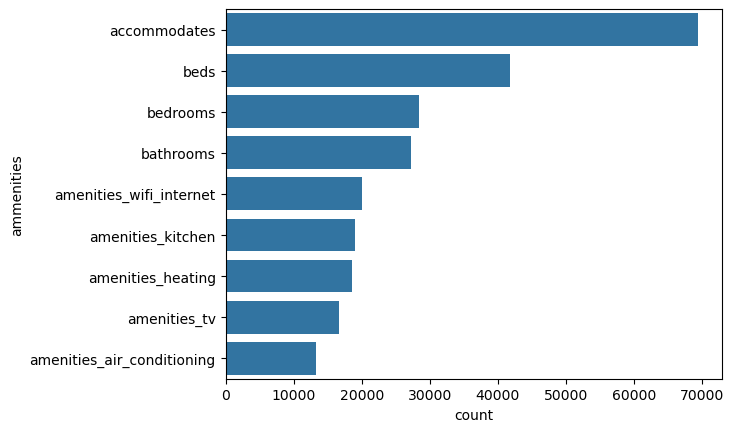

In [173]:
# contar el número de ammenities de cada piso
ammenities = ['accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities_wifi_internet', 'amenities_tv', 'amenities_air_conditioning',
       'amenities_heating', 'amenities_kitchen']
df_ = df[ammenities].sum().to_frame().reset_index()
df_.columns = ["ammenities", "count"]
df_
# bar-plot
sns.barplot(
    data=df_.sort_values('count',ascending=False),
    y="ammenities",
    x="count",
    )

# 1. Elaborar un contexto del problema

Antes de poder definir concretamente el problema que vamos a resolver es
importante ganar algo de contexto. Dedica un poco de tiempo a echar un ojo a los
datos con los que contamos y a sacar unas primeras estadísticas y
visualizaciones. 

El dataset contiene muchas variables, piensa en qué está interesado el cliente y
céntrate en la información esencial para darle un contexto de los datos adecuado.

# 2. Definir el problema que queremos resolver

Una vez mas un cliente nos pide dar respuesta a un problema mal definido. Antes
de lanzarte a picar código es necesario que definas correctamente el problema
que quieres responder. Convierte la pregunta inicial a una en la que el problema
cumpla con los **4 principios esenciales** que hemos visto. Hazte las siguientes
preguntas para entender si vas por buen camino:
- **concreto**: ¿hay alguna ambigüedad en la definición del problema? ¿queda
suficientemente claro para que no haya errores de interpretación ni mal
entendidos?
- **alcance**: ¿está claro cuándo se va a acabar el análisis?
- **valor**: ¿la solución al problema tiene valor para el cliente?
- **accionable**: ¿el cliente tiene capacidad de accionar la solución al
problema?

Cuando vayais ideando vuestra definición del problema podeis escribirme por
privado en Slack para daros el OK y pasar a la siguiente fase.

# 3. Definir y desarrollar el Roadmap del analisis

El dataset tiene muchas variables y tienes un tiempo muy limitado, no tienes que
analizar todo ni dar respuesta a todas las hipótesis que se te ocurran al
inicio, lo importante es que el enfoque para realizar el data storytelling sea
correcto, el resto es echarle mas horas.

Con el tiempo que tienes piensa una lista de hipótesis y las preguntas que
quieres responder con los datos. Estructura el roadmap y prioriza las
hipótesis que creas más prometedoras. Cuando tengas el roadmap claro analiza
los datos con estadísticas y visualizaciones.

# 4. Recopilar los principales insights para montar el storytelling final

Con todo lo trabajado en las anteriores secciones monta un data storytelling con
las siguientes secciones:

- **Contexto**: contexto al problema
- **Problema**: problema definido
- **Insights**: principales insights extraidos en tus análisis

Puedes montar el data storytelling en Google Slides o en un Jupyter Notebook.

### Hipótesis 1
